In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
data = pd.read_csv(r'C:\Users\ankus\OneDrive\Desktop\PYTHON\Python_DS_INTERNSHIP\DATASETS\car_evaluation.csv')
data.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [63]:
columns = ['value', 'maintanence', 'doors', 'person', 'boot', 'safety', 'target_class']

In [64]:
data.columns = columns
data.head()

value maintanence doors person   boot safety target_class
0  vhigh       vhigh     2      2  small    med        unacc
1  vhigh       vhigh     2      2  small   high        unacc
2  vhigh       vhigh     2      2    med    low        unacc
3  vhigh       vhigh     2      2    med    med        unacc
4  vhigh       vhigh     2      2    med   high        unacc

In [65]:
data.shape

(1727, 7)

In [66]:
data.value.value_counts()

high     432
med      432
low      432
vhigh    431
Name: value, dtype: int64

In [67]:
data['target_class'].unique() 

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [68]:
data['target_class'].value_counts() 

unacc    1209
acc       384
good       69
vgood      65
Name: target_class, dtype: int64

In [69]:
data['target_class'].value_counts().sum()

1727

In [70]:
x = data.drop(['target_class'], axis = 1)
y = data['target_class']

In [71]:
x.head()

value maintanence doors person   boot safety
0  vhigh       vhigh     2      2  small    med
1  vhigh       vhigh     2      2  small   high
2  vhigh       vhigh     2      2    med    low
3  vhigh       vhigh     2      2    med    med
4  vhigh       vhigh     2      2    med   high

In [72]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: target_class, dtype: object

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 42)
print(x_train.shape, x_test.shape)

(1381, 6) (346, 6)


In [74]:
!pip install category_encoders

In [75]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = ['value', 'maintanence', 'doors', 'person', 'boot', 'safety'])
x_train = encoder.fit_transform(x_train)  # fit_transform 1st fit the record and then transform.
x_test = encoder.fit_transform(x_test)

In [76]:
print(x_train[0:5])

      value  maintanence  doors  person  boot  safety
107       1            1      1       1     1       1
900       2            2      2       2     1       2
1708      3            3      3       1     2       3
705       4            4      4       1     3       2
678       4            4      2       1     3       2


In [57]:
from sklearn.tree import DecisionTreeClassifier
DT_gini =   DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0 )
DT_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=0)

In [58]:
y_predict_gini = DT_gini.predict(x_test) # here we have predicted values for our x_test data.
print(y_predict_gini)

['unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'vgood' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'vgood' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'good' 'unacc' 'unacc'
 'good' 'unacc' 'unacc' 'vgood' 'acc' 'good' 'unacc' 'unacc' 'good'
 'vgood' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'vgood' 'unacc' 'unacc' 'acc' 'unacc' 'vgood' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'vgood'
 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc'
 'good' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc'
 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'good' 'acc' 'unacc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc'

In [59]:
from sklearn.metrics import accuracy_score
print('Model Accuracy is ', accuracy_score(y_test, y_predict_gini))

Model Accuracy is  0.9653179190751445


[Text(0.47574013157894735, 0.9642857142857143, 'X[5] <= 1.5\ngini = 0.452\nsamples = 1381\nvalue = [307, 54, 972, 48]'),
 Text(0.46258223684210525, 0.8928571428571429, 'gini = 0.0\nsamples = 467\nvalue = [0, 0, 467, 0]'),
 Text(0.4888980263157895, 0.8928571428571429, 'X[3] <= 1.5\ngini = 0.576\nsamples = 914\nvalue = [307, 54, 505, 48]'),
 Text(0.47574013157894735, 0.8214285714285714, 'gini = 0.0\nsamples = 299\nvalue = [0, 0, 299, 0]'),
 Text(0.5020559210526315, 0.8214285714285714, 'X[1] <= 2.5\ngini = 0.625\nsamples = 615\nvalue = [307, 54, 206, 48]'),
 Text(0.2450657894736842, 0.75, 'X[0] <= 1.5\ngini = 0.523\nsamples = 301\nvalue = [136, 0, 157, 8]'),
 Text(0.23190789473684212, 0.6785714285714286, 'gini = 0.0\nsamples = 77\nvalue = [0, 0, 77, 0]'),
 Text(0.2582236842105263, 0.6785714285714286, 'X[0] <= 3.5\ngini = 0.503\nsamples = 224\nvalue = [136, 0, 80, 8]'),
 Text(0.14802631578947367, 0.6071428571428571, 'X[4] <= 1.5\ngini = 0.431\nsamples = 148\nvalue = [106, 0, 34, 8]'),
 Tex

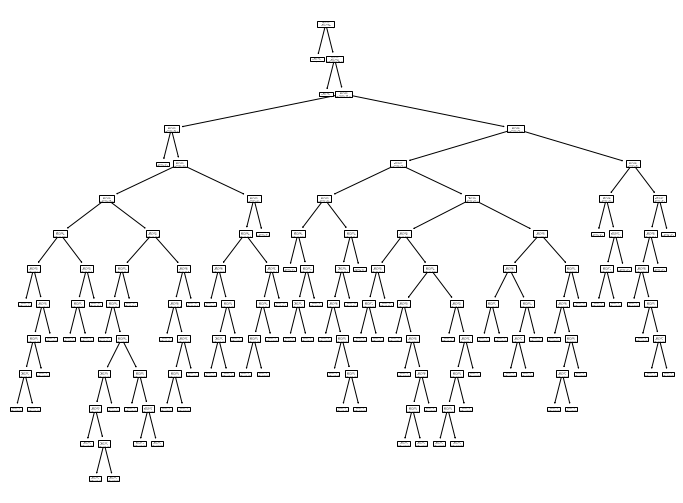

In [60]:
plt.figure(figsize=(12,9))
from sklearn import tree
tree.plot_tree(DT_gini.fit(x_train, y_train))